In [30]:
#调用基本包
import pandas as pd
#数据读取
app=pd.read_csv(r'D:\BaiduNetdiskDownload\数据分析课程\数据预处理资料\applestore.csv')
#数据的基本信息
app.info()
app.head()
app.drop('Unnamed: 0',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   prime_genre       7197 non-null   object 
 8   sup_devices       7197 non-null   int64  
 9   ipadSc_urls       7197 non-null   int64  
 10  lang              7197 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 618.6+ KB


In [33]:
app.describe()
app['size_mb'] = app['size_bytes'] / (1024 * 1024.0)
app.size_mb.describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

In [34]:
# 根据价格新增标签
app['paid'] = app['price'].apply(lambda x: 1 if x > 0 else 0)
#lambda阐述规则，X为price，为paid赋值，即当price＞0，paid为1，其他情况下，paid为0
app.paid.describe()

count    7197.000000
mean        0.436432
std         0.495977
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: paid, dtype: float64

In [35]:
#value_counts (price,prime_genre)
#value_Coutn只能对应series，不能对整个dataframe做操作
app.price.value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
39.99        2
27.99        2
49.99        2
22.99        2
23.99        2
20.99        2
16.99        2
21.99        1
47.99        1
99.99        1
249.99       1
18.99        1
34.99        1
299.99       1
74.99        1
Name: price, dtype: int64

In [36]:
#数据的快速分组
bins = [0,2,10,300]
labels = [  '<2', '<10','<300']
app['price_new']=pd.cut(app.price, bins, right=False, labels=labels)
#分组后查看数据分布情况
app.groupby(['price_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,5405.0,0.361981,0.675318,0.00,0.00,0.00,0.00,1.99
<10,1695.0,4.565811,1.864034,2.99,2.99,3.99,4.99,9.99
<300,97.0,28.124021,38.886220,11.99,14.99,19.99,24.99,299.99


In [37]:
# groupby的操作,不同类别app的价格分布
app.groupby(['prime_genre'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,57.0,5.116316,10.247031,0.0,0.0,2.99,4.99,59.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,453.0,4.028234,18.725946,0.0,0.0,2.99,2.99,299.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


In [38]:
#删除价格大于等于49.99的app
app=app[app['price']<=49.99]

#评论情况分析
app.rating_count_tot.describe()

count    7.190000e+03
mean     1.290515e+04
std      7.577526e+04
min      0.000000e+00
25%      2.725000e+01
50%      3.005000e+02
75%      2.796750e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

In [39]:
#对用户打分的分组
bins = [0,1000,5000,100000,5000000]
app['rating_new']=pd.cut(app.rating_count_tot, bins, right=False)
#用户打分和价格的关系
app.groupby(['rating_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_new,,,,,,,,
"[0, 1000)",4587.0,1.798696,3.324682,0.0,0.0,0.0,2.99,49.99
"[1000, 5000)",1193.0,1.740721,3.203853,0.0,0.0,0.0,2.99,39.99
"[5000, 100000)",1192.0,0.963549,1.984895,0.0,0.0,0.0,0.99,14.99
"[100000, 5000000)",218.0,0.196376,0.925160,0.0,0.0,0.0,0.00,7.99


<Figure size 2160x1440 with 0 Axes>

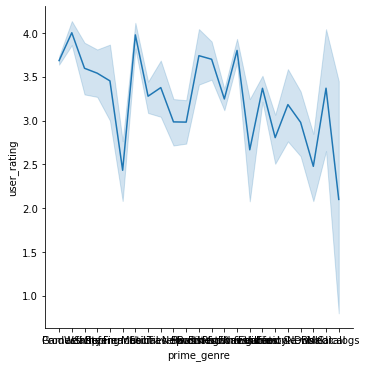

In [41]:
# 业务数据可视化
#可视化部分
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#app评分关系
plt.figure(figsize=(30,20))#调整大小
sns.relplot(x="prime_genre", y="user_rating",kind='line',
              data=app) #折线图

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

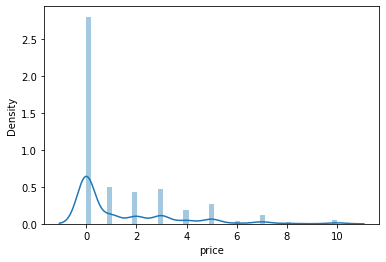

In [42]:
app1=app[app['price']<=9.99]
#直方图，APP价格的分布
sns.distplot(app1['price'])

<AxesSubplot:xlabel='price', ylabel='prime_genre'>

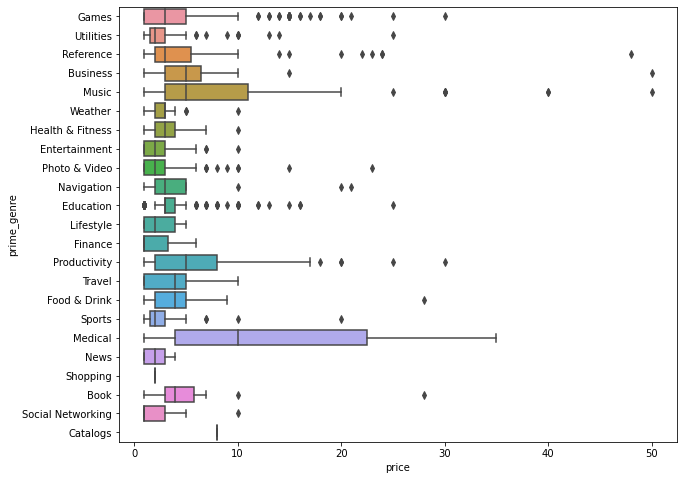

In [43]:
#业务问题2：收费app的价格分布是如何的？不同类别之间有关系吗？

#箱线图，不同类别APP价格
plt.figure(figsize=(10,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']==1])

#业务解答：价格绝大部分都集中在9.99美元以内，个别类别（如医疗）等因专业性总体价格会高于其他类别

<AxesSubplot:xlabel='price', ylabel='prime_genre'>

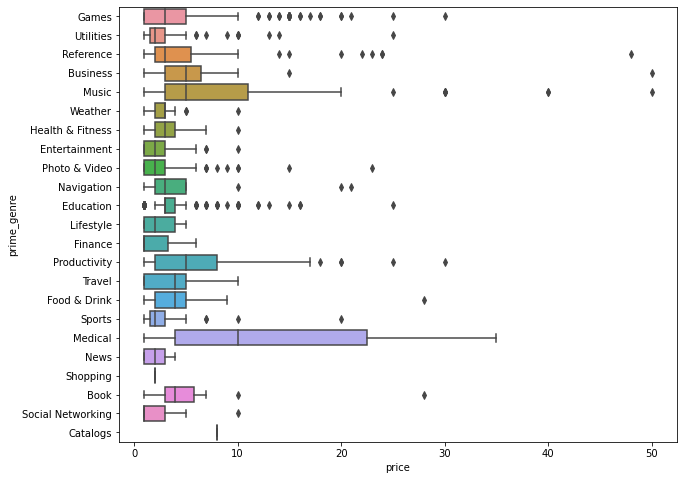

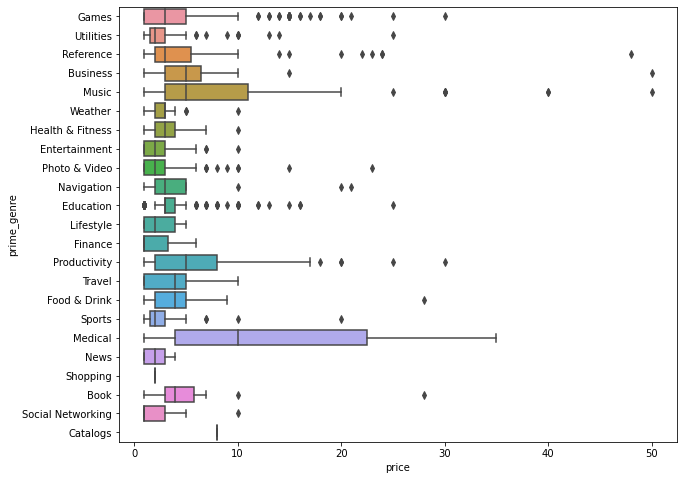

In [45]:
#箱线图，前五个类别的app价格

plt.figure(figsize=(10,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']==1])
#箱线图，前五个类别的app价格

plt.figure(figsize=(10,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']==1])

<AxesSubplot:xlabel='price', ylabel='user_rating'>

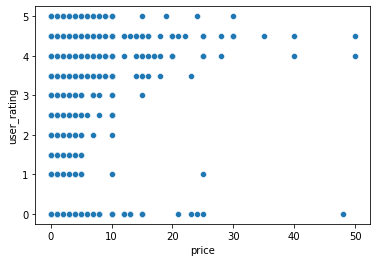

In [46]:
#散点图，价格和用户评分的分布
sns.scatterplot(x='price',y='user_rating',data=app)

<AxesSubplot:xlabel='prime_genre', ylabel='user_rating'>

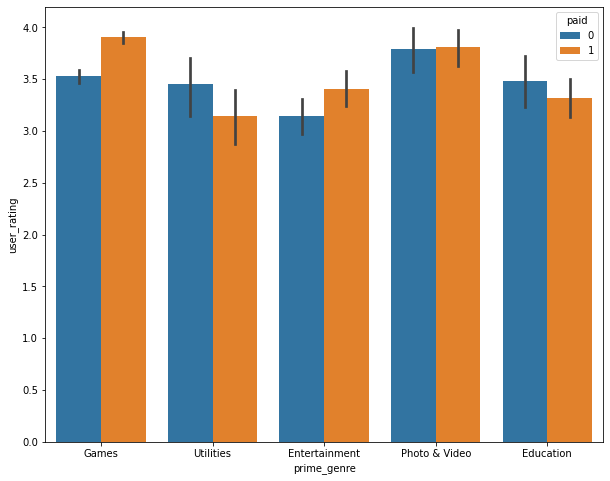

In [47]:
#只保留五个类别数据
top5= ['Games','Entertainment', 'Education', 'Photo & Video',
       'Utilities']
app5 = app[app.prime_genre.isin(top5)]
#柱状图，前5个类别app的用户评分均值
#同一类别，将免费和付费的评分进行对比
plt.figure(figsize=(10,8))
sns.barplot(x='prime_genre',y='user_rating',hue='paid',data=app5)

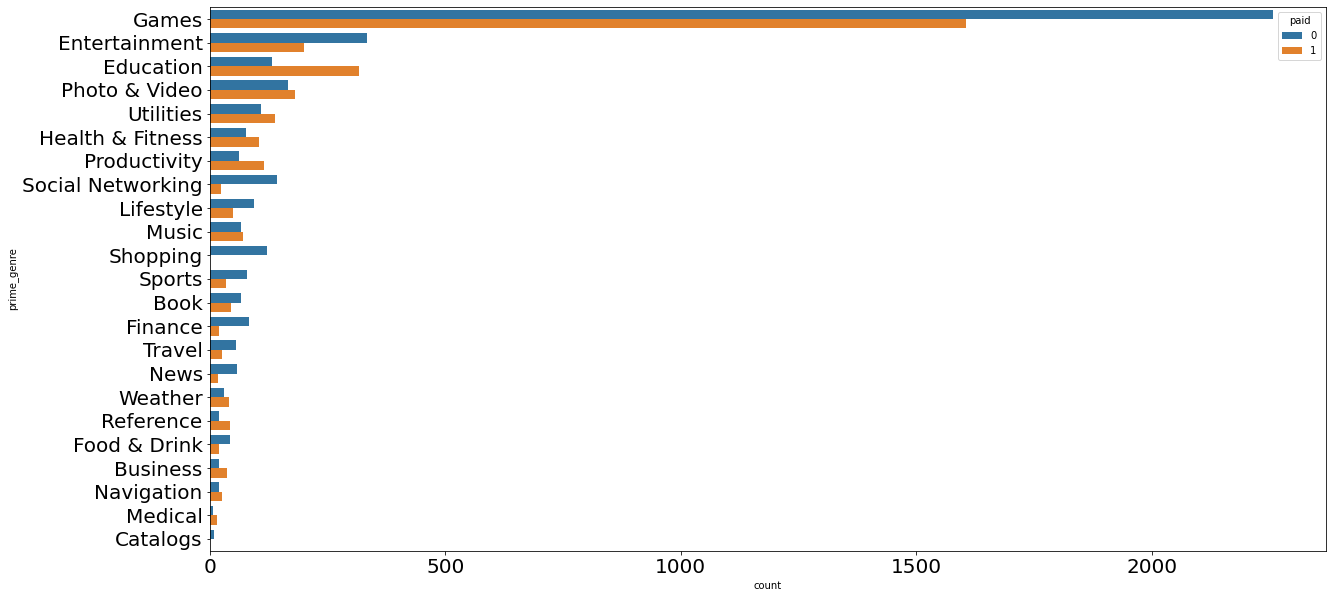

In [48]:
# 业务解读
#使用countplot--count是对数据加总，plot将数据进行可视化
#使用order对数据进行排序

plt.figure(figsize=(20,10))
sns.countplot(y='prime_genre',hue='paid',data=app,order=app['prime_genre'].value_counts().index)
plt.tick_params(labelsize=20)

#业务解答：都是高度集中在游戏类别

<AxesSubplot:xlabel='paid', ylabel='count'>

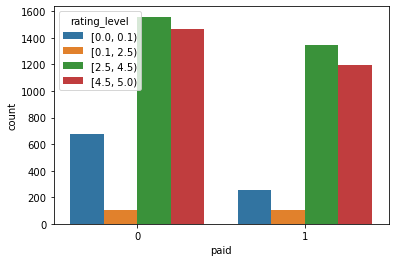

In [49]:
bins=[0,0.1,2.5,4.5,5]
app['rating_level']=pd.cut(app.user_rating,bins,right=False)
app.groupby(['rating_level'])['user_rating'].describe()
'''
               count      mean       std  min  25%  50%  75%  max
rating_level                                                     
[0.0, 0.1)     929.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
[0.1, 2.5)     206.0  1.650485  0.400213  1.0  1.5  2.0  2.0  2.0
[2.5, 4.5)    2903.0  3.646056  0.467987  2.5  3.5  4.0  4.0  4.0
[4.5, 5.0)    2660.0  4.500000  0.000000  4.5  4.5  4.5  4.5  4.5
'''
sns.countplot(x='paid',hue='rating_level',data=app)